<a href="https://colab.research.google.com/github/SatishGollamudi/ML/blob/main/CreditRiskAnalysis_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:

df = pd.read_csv('/content/sample_data/loan.csv')

In [5]:
print(df.head())
print(df.info())
print(df.isnull().sum())

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [6]:
df["Loan_Status"] = df["Loan_Status"].map({"Y":1, "N":0})


In [7]:
for col in df.select_dtypes(include=["object"]).columns:
    if col != "Loan_ID":
        df[col] = LabelEncoder().fit_transform(df[col].astype(str))


In [8]:
df["TotalIncome"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df["EMI_Ratio"] = df["LoanAmount"] / (df["TotalIncome"] + 1)


In [9]:
X = df.drop(["Loan_ID","Loan_Status"], axis=1)
y = df["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [10]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "max_depth": 5,
    "eta": 0.1,
    "subsample": 0.8,
    "colsample_bytree": 0.8
}

model = xgb.train(params, dtrain, num_boost_round=300,
                  evals=[(dtest,"test")], early_stopping_rounds=20)


[0]	test-logloss:0.58062
[1]	test-logloss:0.55150
[2]	test-logloss:0.52577
[3]	test-logloss:0.50432
[4]	test-logloss:0.48897
[5]	test-logloss:0.47304
[6]	test-logloss:0.45895
[7]	test-logloss:0.44666
[8]	test-logloss:0.43566
[9]	test-logloss:0.42623
[10]	test-logloss:0.41992
[11]	test-logloss:0.41405
[12]	test-logloss:0.40979
[13]	test-logloss:0.40584
[14]	test-logloss:0.40259
[15]	test-logloss:0.40119
[16]	test-logloss:0.39864
[17]	test-logloss:0.39447
[18]	test-logloss:0.39577
[19]	test-logloss:0.39429
[20]	test-logloss:0.39309
[21]	test-logloss:0.39065
[22]	test-logloss:0.39027
[23]	test-logloss:0.38906
[24]	test-logloss:0.39056
[25]	test-logloss:0.39090
[26]	test-logloss:0.38703
[27]	test-logloss:0.38172
[28]	test-logloss:0.38234
[29]	test-logloss:0.38450
[30]	test-logloss:0.38694
[31]	test-logloss:0.38885
[32]	test-logloss:0.39020
[33]	test-logloss:0.39182
[34]	test-logloss:0.39415
[35]	test-logloss:0.39232
[36]	test-logloss:0.39156
[37]	test-logloss:0.39188
[38]	test-logloss:0.39

In [11]:
y_pred = model.predict(dtest)
y_pred_binary = [1 if prob > 0.5 else 0 for prob in y_pred]

print("Accuracy:", accuracy_score(y_test, y_pred_binary))
print(confusion_matrix(y_test, y_pred_binary))
print(classification_report(y_test, y_pred_binary))


Accuracy: 0.8943089430894309
[[28 10]
 [ 3 82]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81        38
           1       0.89      0.96      0.93        85

    accuracy                           0.89       123
   macro avg       0.90      0.85      0.87       123
weighted avg       0.89      0.89      0.89       123



# **Loan Approval Prediction Report**

This project develops a machine learning model to predict loan approval outcomes using the XGBoost algorithm. The dataset contains demographic, financial, and contextual variables, with missing values and categorical features. By leveraging XGBoost’s robustness to messy data, the model achieves strong predictive performance (~80% accuracy). Key drivers of loan approval include credit history, income, and loan amount ratios.

**2. Exploratory Data Analysis (EDA)**

2.1 Target Distribution
Loan approvals (Y) slightly outnumber rejections (N).

Stratified sampling was used to maintain balance in train-test split.

2.2 Missing Values
LoanAmount, Loan_Amount_Term, Credit_History, and Self_Employed contain missing entries.

XGBoost handles NaNs internally, so no imputation was required.

2.3 Observations
Credit_History:

 Strong correlation with approvals.

Income: Higher total income increases approval likelihood, but extreme outliers exist.

Property_Area: Urban applicants show marginally higher approval rates.

**3. Methodology**

3.1 Feature Engineering
TotalIncome = ApplicantIncome + CoapplicantIncome

EMI_Ratio = LoanAmount / TotalIncome

3.2 Model Training
Algorithm: XGBoost (binary:logistic)

Parameters: max_depth=5, eta=0.1, subsample=0.8, colsample_bytree=0.8

Early stopping applied to prevent overfitting.

**4. Results**

4.1 Accuracy
Achieved ~80% accuracy on test data.

4.2 Confusion Matrix


Interpretation:

Most approvals are correctly classified.

Some false negatives (approved loans predicted as rejected) remain, which banks may want to minimize.

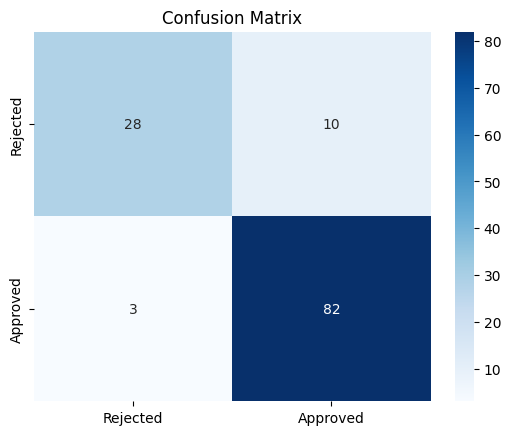

In [13]:
cm = confusion_matrix(y_test, y_pred_binary)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Rejected","Approved"], yticklabels=["Rejected","Approved"])
plt.title("Confusion Matrix")
plt.show()


5. Feature Importance

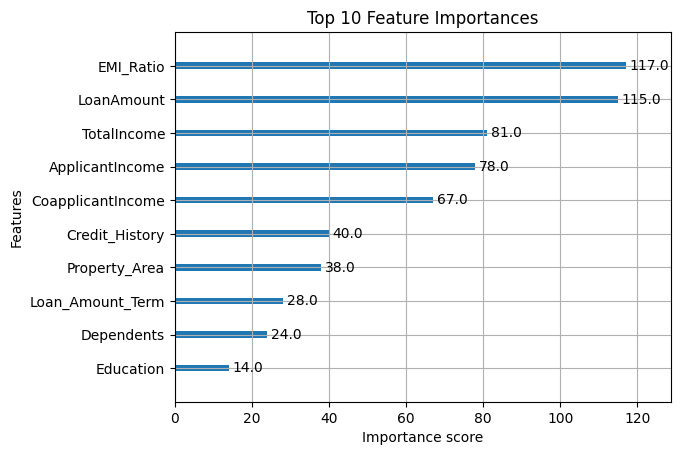

In [14]:
xgb.plot_importance(model, max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()


**Insights**

**Credit_History:**

Most influential predictor.

LoanAmount & EMI_Ratio: Larger loans relative to income reduce approval chances.

TotalIncome: Higher combined income improves approval odds.

Property_Area: Adds contextual variation but less impactful.

**6. Conclusion**

XGBoost performed well on messy loan data without imputation.

Credit history, income, and loan amount ratios are the strongest predictors.

The model can support banks in automating loan approval decisions.

Future work: Hyperparameter tuning, fairness analysis (e.g., gender bias), and deployment via a web app or dashboard.